### Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')
from src.feature_extraction import FeatureExtractionConfig
from src.segmentaion import DeepCut,DeepCutConfig
from src.dataset import ISICDataset
from src.utils import seed_everything, display_segmentation_results

### Reproducibility

In [2]:
SEED = 42
seed_everything(SEED)

### Load the dataset

In [3]:
dataset = ISICDataset(root="/home/abdelnour/Downloads/ISBI2016_ISIC_Part3B_Training_Data")
print(len(dataset))

900


### Load an example

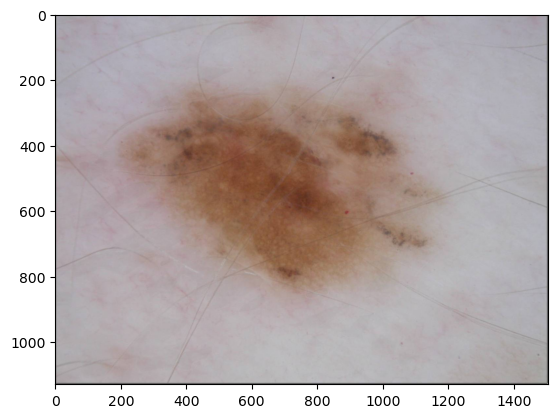

In [4]:
sample = dataset[12]
plt.imshow(sample['image'])

### Segmentation

In [5]:
config = DeepCutConfig(
    cut=True,
    alpha=1.0,
    feature_extractor_config=FeatureExtractionConfig(
        model_name="facebook/dino-vits8",
        device="cuda",
        feature_type="key",
    ),
    activation="leaky_relu",
    num_layers=1,
    conv_type="gcn",
    hidden_dim=64,
    num_clusters=2,
    device="cuda",
)

In [6]:
deep_cut = DeepCut(config)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Optimizing:   0%|          | 0/10 [00:00<?, ?it/s]

IoU: 0.900


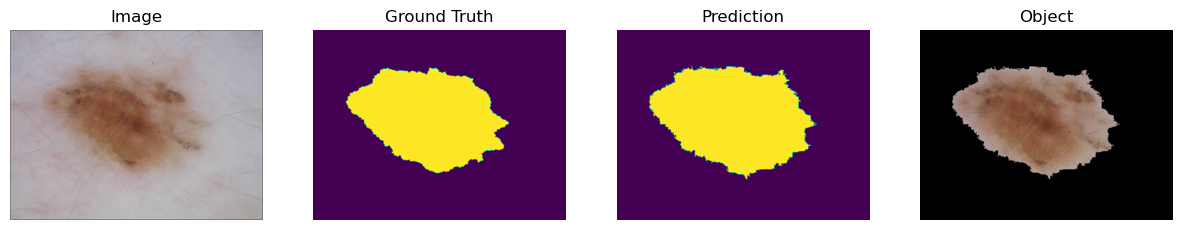

In [16]:
mask, _ = deep_cut.segment(sample['image'], lr=0.01, n_iters=10, show_progress=True)
display_segmentation_results(sample, mask)